-------------------
####Title: Homework 3 - Python
####Author: Shakir Ahmed
####Date: 2023-10-20 (YYYY-MM-DD)
-------------------

# Classification in Python


## Spam classification Dataset
The dataset classifies 4601 e-mails as spam or non-spam, with additional variables indicating the frequency of certain words and characters in the e-mail. \
\
Data dictionary: \
`crl.tot`	- Total length of uninterrupted sequences of capitals \
`dollar` - Occurrences of the dollar sign, as percent of total number of characters \
`bang` - Occurrences of ‘!’, as percent of total number of characters \
`money` - Occurrences of ‘money’, as percent of total number of characters \
`n000` - Occurrences of the string ‘000’, as percent of total number of words \
`make` - Occurrences of ‘make’, as a percent of total number of words \
`yesno` - Outcome variable, a factor with levels 'n' not spam, 'y' spam

In [1]:
import pandas as pd
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

Reading the spam classfication dataset from github `data` folder

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/INFO-523-Exercises/hw-03-Shakir0585/main/data/spam.csv', header='infer')
data

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


Since the dataset is already classified as a binary classification as 'y' or 'n', there is no need for classification code. \
We can apply Pandas cross-tabulation to examine the relationship between the `crl.tot` column (Total length of uninterrupted sequences of capitals) and `bang` column (Occurrences of ‘!’, as percent of total number of characters) attributes with respect to the `yesno` binary classifier column.

In [3]:
pd.crosstab([data['crl.tot'],data['bang']],data['yesno'])

yesno          n  y
crl.tot bang       
1       0.000  8  0
        0.684  1  0
2       0.000  8  3
        4.347  0  1
        5.000  0  1
...           .. ..
9088    0.030  0  1
9090    0.034  0  1
9163    0.356  0  1
10062   1.542  0  1
15841   0.000  0  1

[2598 rows x 2 columns]

## Decision Tree Classifier

We apply a decision tree classifier to the spam classification dataset described in the previous subsection. \

The following commands will extract the predictor (X) and target class (Y) attributes from the spam dataset and create a decision tree classifier object using entropy as its impurity measure for splitting criterion.

In [4]:
Y = data['yesno']
X = data.drop(['yesno'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf = clf.fit(X, Y)

Now the classifier is trained on the labeled data using the fit() function.

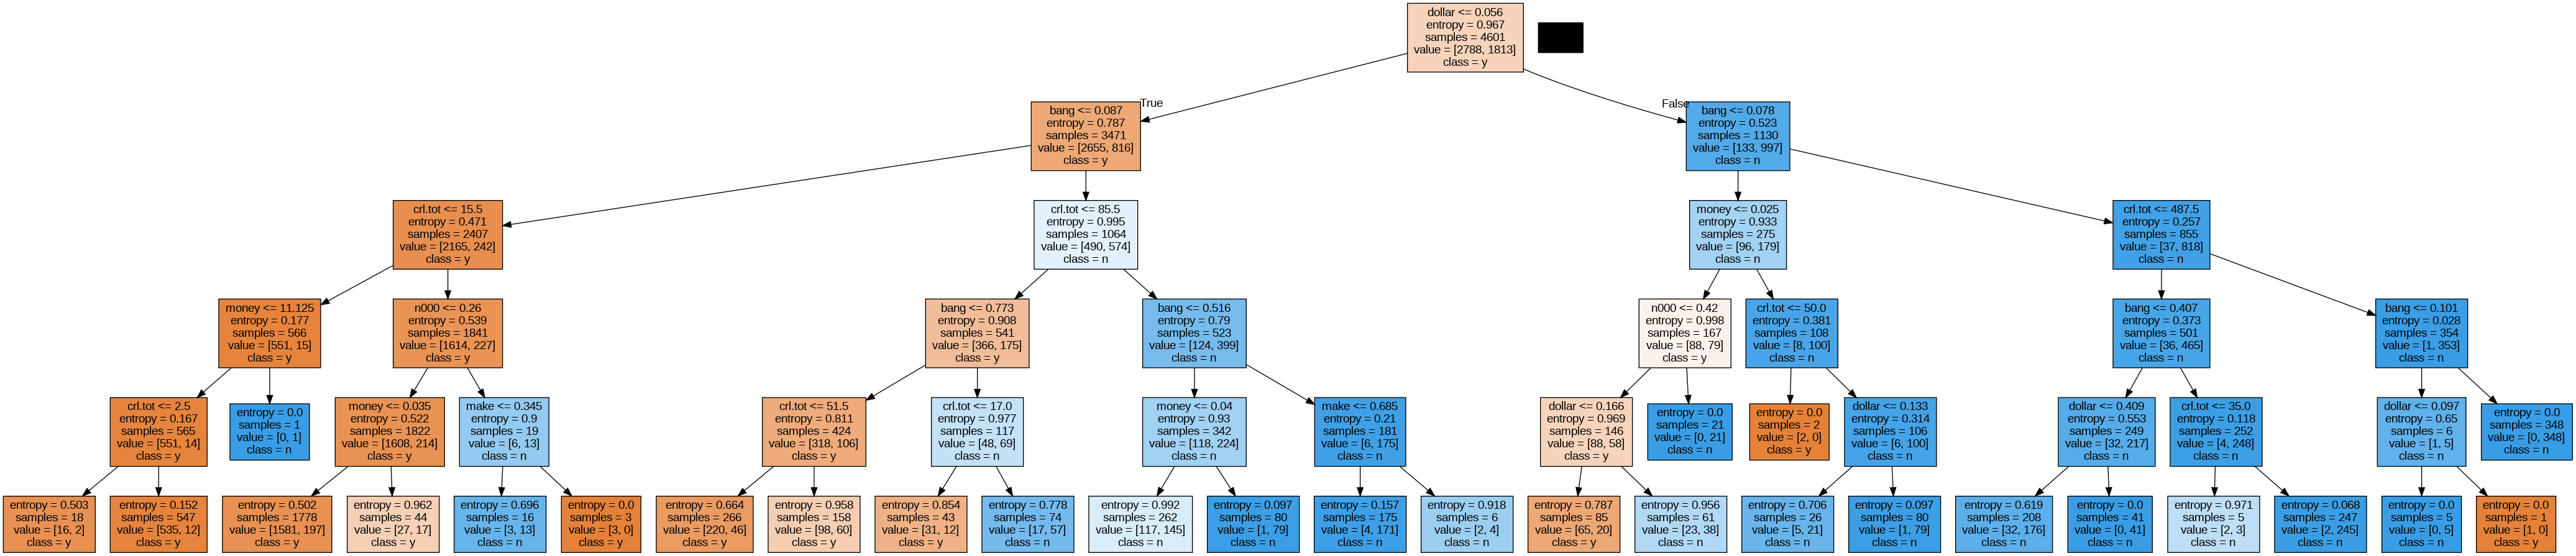

In [5]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['y','n'], filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Summary:** The code creates a visual representation of a decision tree model using features and class names, filled nodes, and displays it as an image for interpretation and analysis. Depth of 5 is applied for the decision tree to reflect depth of testing and to provide more accurate predictions.\
\
Next, suppose we apply the decision tree to classify the following test examples.

In [6]:
testData = [[89,0.816,0.137,0.33,1.66,1,'n'],
           [25,0.21,0.08,0.08,0.78,0.17,'n'],
           [378,0.3,1.055,0.18,0,0,'y'],
           [62,0.08,0.137,0.76,0.25,0.25,'y']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,crl.tot,dollar,bang,money,n000,make,yesno
0,89,0.816,0.137,0.33,1.66,1.00,n
1,25,0.210,0.080,0.08,0.78,0.17,n
2,378,0.300,1.055,0.18,0.00,0.00,y
3,62,0.080,0.137,0.76,0.25,0.25,y


Code to predict the yesno parameter based on above test data. \
Step 1: Extract the predictor and target class attributes from test data \
Step 2: Apply the decision tree classifier to predict their classes.

In [7]:
testY = testData['yesno']
testX = testData.drop(['yesno'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['crl.tot'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,crl.tot,Predicted Class
0,89,y
1,25,y
2,378,y
3,62,y


Now we are going to calculate and display the accuracy of the classifier on the test data.

In [8]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.50


**Summary:** From the above dummy data, we notice that there has been a prediction, where two valuesout of four has been changed. Hence, the model accuracy of prediction is 50%.

## Model Overfitting
For this exercise, we allocate 75% of the labeled data for training and the remaining 25% for testing. \
We then fit decision trees of different maximum depths (from 2 to 50) to the training set and plot their respective accuracies when applied to the training and test sets.


Text(0, 0.5, 'Accuracy')

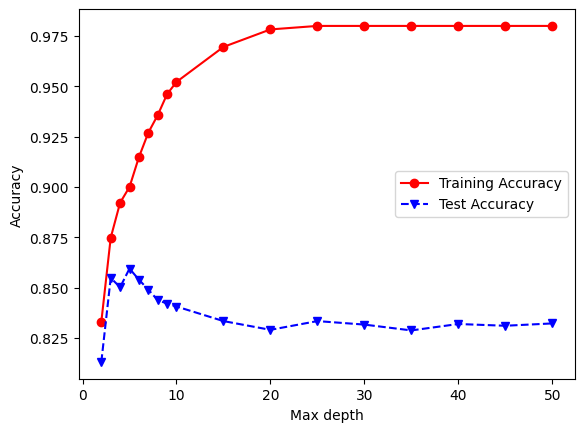

In [9]:
#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.75, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

**Summary:** Training accuracy starts from about 83% and steadily increases to about 97.5% at depth of 20, and then becomes constant until depth of 50. Testing accuracy on the other hand peaks at around 86% at depth of around 6 and then steadily decreases gradually till depth of 20 and then becomes almost constant till depth of 50.

## Alternative Classification Techniques
Following is the code to illustrate how to apply the k-nearest neighbor classifier, linear classifiers (logistic regression and support vector machine), as well as ensemble methods (boosting, bagging, and random forest) to the 2-dimensional data. \

### K Nearest Neighbor

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))
clf

KNeighborsClassifier(n_neighbors=30)

Text(0, 0.5, 'Accuracy')

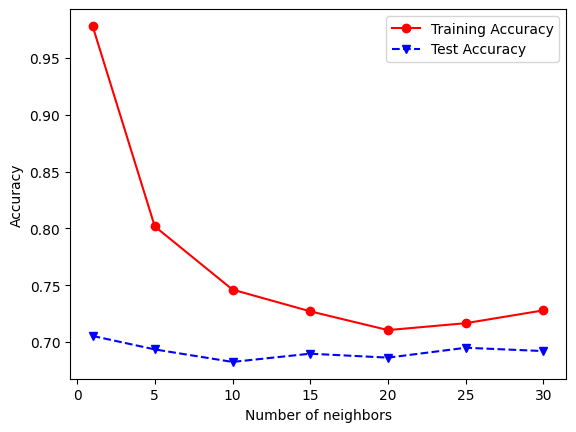

In [11]:
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

**Summary:** Training accuracy starts from above 95% and steadily falls to a value of around 72% with number of neighbors as 20. From there till neighbors of 30, there is a gradual increase, and final accuracy is at around 73% at neighbor of 50. The testing accuracy starts from around 71% and remains fairly even for number of neighbors of 0 to 30 and final accuracy of just below 70%.

### Linear Classifiers
Linear classifiers such as logistic regression and support vector machine (SVM) constructs a linear separating hyperplane to distinguish instances from different classes.


In [12]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

for param in C:
    # Logistic Regression
    clf = linear_model.LogisticRegression(C=param, max_iter=1000)
    clf.fit(X_train_scaled, Y_train)
    Y_predTrain = clf.predict(X_train_scaled)
    Y_predTest = clf.predict(X_test_scaled)
    LRtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(Y_test, Y_predTest))

    # Support Vector Machine (SVM)
    clf = SVC(C=param, kernel='linear')
    clf.fit(X_train_scaled, Y_train)
    Y_predTrain = clf.predict(X_train_scaled)
    Y_predTest = clf.predict(X_test_scaled)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

Text(0, 0.5, 'Accuracy')

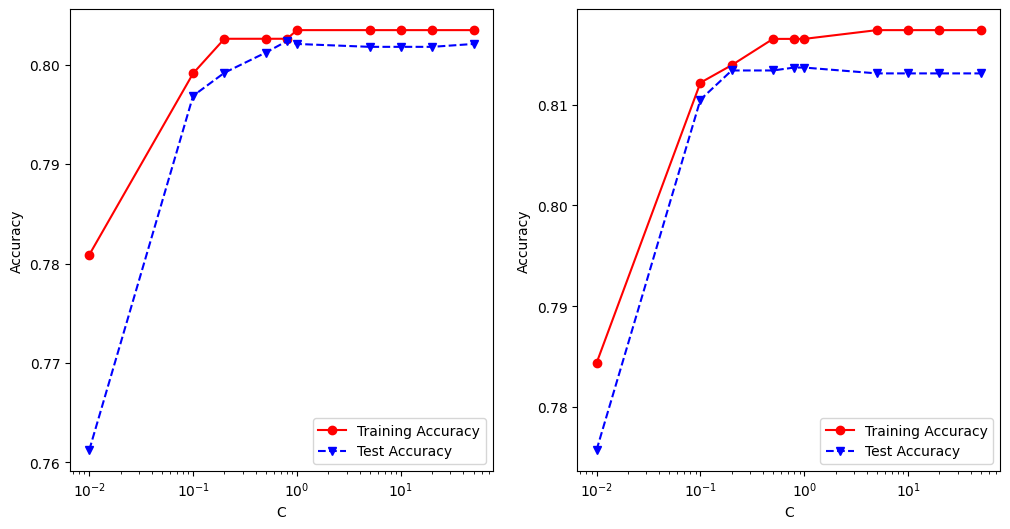

In [13]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy'])
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')

ax2.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')

**Summary:** Training accuracy starts from around 78% at a C value of 0.01 and rises substantially till value of 1, then it becomes constant till 50. The testing accuracy starts from around 76% at C value of 0.01, and rises substantially till value of 1, and then fluctuates slightly till value of 50, with accuracy peaking at around 81% at C value of 1.

### Nonlinear Support Vector Machine
The code below shows an example of using nonlinear support vector machine with a Gaussian radial basis function kernel to fit the 2-dimensional dataset.

In [14]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))
clf

SVC(C=50, gamma='auto')

Text(0, 0.5, 'Accuracy')

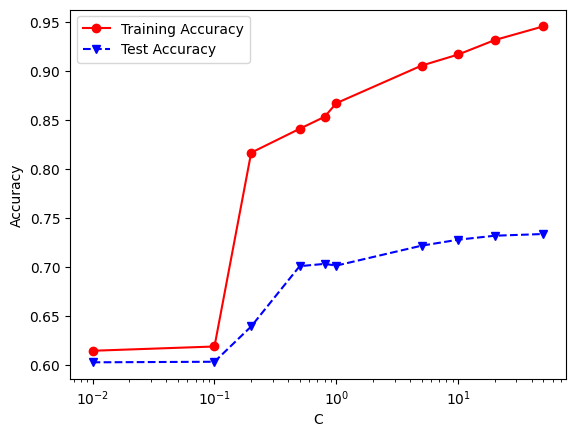

In [15]:
plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

**Summary:** The graph starts at roughly the same accuracy of around 61% for training and testing data. There is a sudden increase in both data at around C value of 0.1, and value peaks for both at around 95% for training and 72% for testing at C value of 50.

## Ensemble Methods
An ensemble classifier constructs a set of base classifiers from the training data and performs classification by taking a vote on the predictions made by each base classifier. We consider 3 types of ensemble classifiers in this example: bagging, boosting, and random forest. \
In the example below, we fit 500 base classifiers to the 2-dimensional dataset using each ensemble method. The base classifier corresponds to a decision tree with maximum depth equals to 10.

In [16]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [17]:
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  n_estimators=500)

In [18]:
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=500)

[Text(1.5, 0, 'Random Forest'),
 Text(2.5, 0, 'Bagging'),
 Text(3.5, 0, 'AdaBoost')]

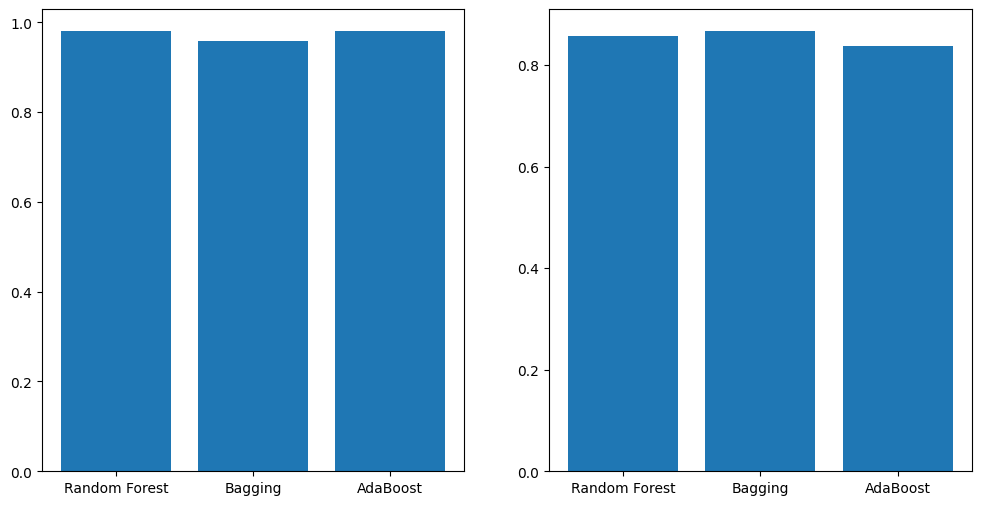

In [19]:
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

**Summary:** Training data acheives an accuracy of around 96% for the three types of ensemble method- Random forest, bagging and ada boost. Between the three the performance of random forest and Adaboost is the highest. \
For testing accuracy- bagging has the highest accuracy among the three by fairly a small amount at around 84%. Random forest and Adaboost have an accuracy of around 83%.

**Overall:**
For classification techniques, Linear classifier had the best testing accuracy at around 80%-81% followed by non linear support vector machines with an accuracy of around 73% followed by K Nearest Neighbors with an accuracy of around 70%.
